# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

- **Most common words** - find these and create word clouds
- **Amount of profanity** - most common term

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('./pickle/dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,dave,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,1,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('think', 18),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('yeah', 17),
  ('time', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('ive', 15),
  ('okay', 15),
  ('baby', 15),
  ('gonna', 15)],
 

In [3]:
top_dict['dave']

[('like', 103),
 ('know', 79),
 ('said', 63),
 ('just', 61),
 ('im', 47),
 ('shit', 46),
 ('people', 43),
 ('didnt', 39),
 ('ahah', 38),
 ('dont', 38),
 ('time', 36),
 ('fuck', 33),
 ('thats', 33),
 ('fucking', 32),
 ('black', 31),
 ('man', 30),
 ('got', 27),
 ('good', 27),
 ('right', 22),
 ('gonna', 21),
 ('gay', 20),
 ('lot', 20),
 ('did', 19),
 ('hes', 19),
 ('yeah', 19),
 ('oj', 18),
 ('oh', 18),
 ('come', 17),
 ('kevin', 16),
 ('guys', 16)]

In [4]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, wanna, gotta, oh
---
anthony
im, like, know, dont, joke, got, thats, said, anthony, say, day, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
jim
like, im, dont, right, fucking, went, just, know, youre, people, thats, oh, day, think
---
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, im, thats, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, thats, think, says, cause, jenny, right, goes, really
---
ricky
right, like, im, just, dont, know, said, yeah, fucking, got, say, youre, went, id
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'yeah',
 'tell',
 'dude',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'anthony',
 'say',
 'day',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'think',
 'grandma',
 'right',
 'thing',
 'yeah',
 'time',
 'did',
 'good',
 'school',
 'jokes',
 'ive',
 'okay',
 'baby',
 'gonna',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'theres',
 'let',
 'little',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'ahah',
 'dont',
 'time',
 'fuck',
 'thats',
 'fucking',
 'black',
 'man',
 'got',
 'g

In [6]:
# Let's aggregate this list and identify the most common words along with their frequencies in the top word list
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('really', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('dude', 2),
 ('joke', 2),
 ('guys', 2),
 ('guy', 2),
 ('come', 2),
 ('man', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('life', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('make', 1),
 ('let', 1),
 ('ahah', 1),
 ('black', 1),
 ('gay', 1),
 ('oj', 1),
 ('kev

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('./pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = list(stop_words)

In [9]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("./pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("./pickle/dtm_stop.pkl")

In [10]:
data_stop

,aaaaah,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,...,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,3,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
ricky,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
data.transpose()

,aaaaah,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,...,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,3,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
ricky,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

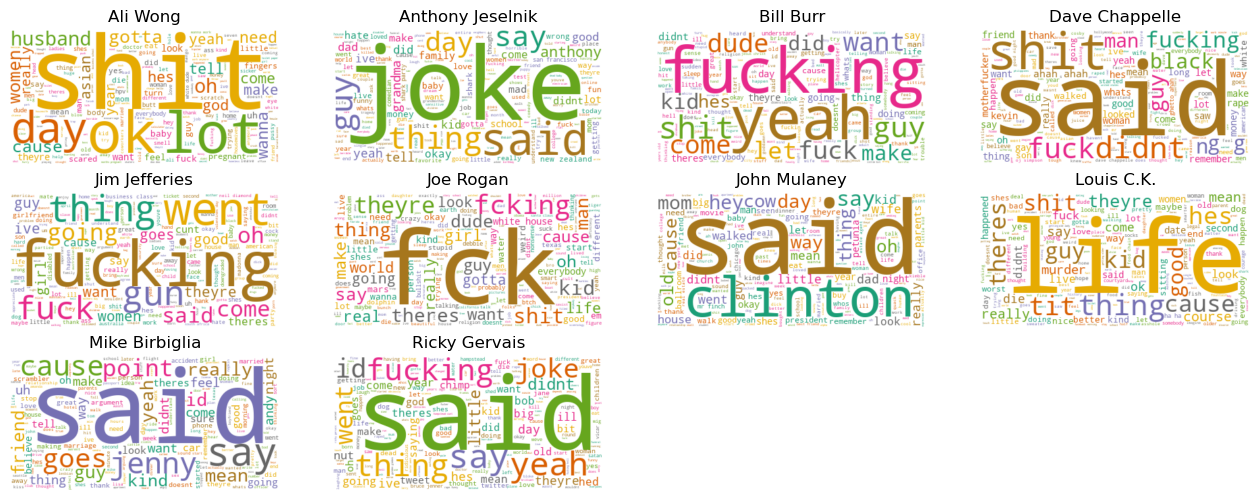

In [13]:
# Reset the output dimensions
import matplotlib.pyplot as plt
# Allows charts to appear in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Jim Jefferies', 
              'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Amount of Profanity

### Analysis

In [14]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('really', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('dude', 2),
 ('joke', 2),
 ('guys', 2),
 ('guy', 2),
 ('come', 2),
 ('man', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('life', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('make', 1),
 ('let', 1),
 ('ahah', 1),
 ('black', 1),
 ('gay', 1),
 ('oj', 1),
 ('kev

In [15]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
dave,65,46
jim,115,20
joe,0,40
john,4,6
louis,21,25
mike,0,0
ricky,60,6


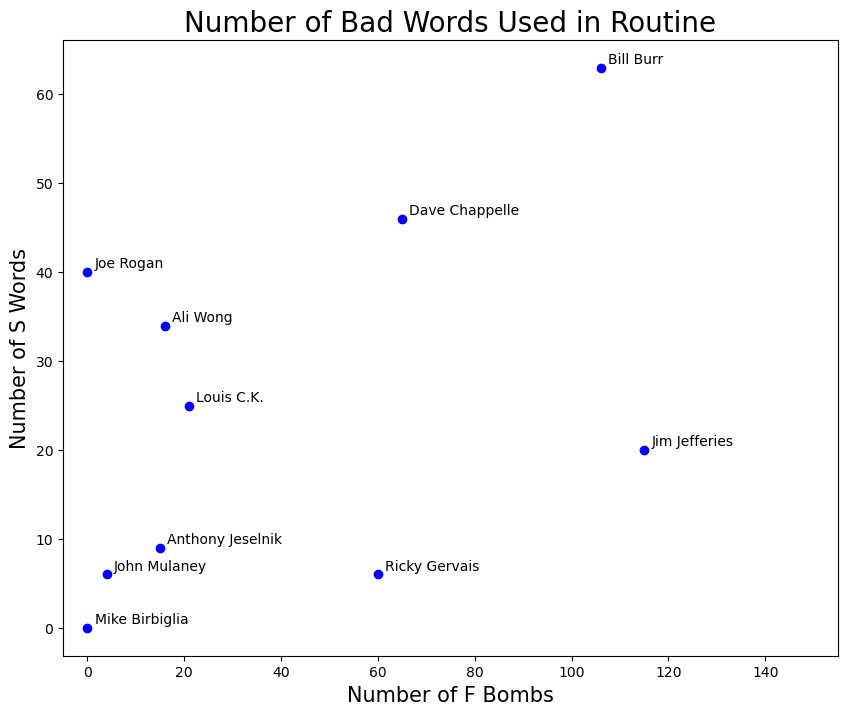

In [16]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

## Side Note

**To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.